# NLP Analysis: Cleaning the data

After doing an Exploratory Data Analysis, I wanted to take a closer look at the reviews of each movie and TV show from the dataset, checking if there is any difference to them separating by the most common gender.

In this notebook I prepared the data in order to use the VADER module, which gives a sentiment analysis from the input received. I applied this method on the notebook *NLP Analysis: Sentiment Analysis with VADER.*

In [33]:
import pandas as pd
import nltk

import sys
sys.path.insert(0, '../Functions')
from Functions_EDA import *

## Reading the dataset

I read the .csv file obtained from the Exploratory Data Analysis.

In [35]:
data = pd.read_csv('../Datasets/final_dataset_clean.csv', index_col=0)
data.head()

,Title,Link,Type,Year_Release,Country,Directors,Women_Directors,Men_Directors,Not_Set_Directors,Total_Directors,...,%_Not_Set_Cast,Genres,Description,RatingAverage,Votes,Reviews,Country_Code,Continent,Most_Common_Gender_Cast,Most_Common_Gender_Directors
0,Money Heist,https://www.filmaffinity.com/us/film879405.html,TV show,2017,Spain,"Álex Pina, Jesús Colmenar, Miguel Ángel Vivas,...",0,5,2,7,...,5.13,"TV Series, Thriller, Mystery, Heist Film, Kidn...",TV Series (2017-Present Day). 4 Seasons. A mys...,7.1,25691.0,"""[4th Season Review]: [It] is like an extended...",ESP,Europe,Men,Men
1,The Blacklist,https://www.filmaffinity.com/us/film573633.html,TV show,2013,United States of America,"Jon Bokenkamp, Michael W. Watkins, Andrew McCa...",4,32,0,36,...,0.00,"TV Series, Mystery, Drama, Crime, Spy Film","The world's most wanted criminal, Thomas Raymo...",6.4,5148.0,"""His name is above the title and, depending ho...",USA,Americas,Men,Men
2,Locked Up,https://www.filmaffinity.com/us/film441483.html,TV show,2015,Spain,"Iván Escobar, Esther Martínez Lobato, Daniel É...",2,3,4,9,...,6.25,"TV Series, Thriller, Drama, Prison Drama",Macarena Ferreiro is a young naive woman who f...,7.0,6941.0,NaN,ESP,Europe,Women,Men
3,Prison Break,https://www.filmaffinity.com/us/film822756.html,TV show,2005,United States of America,"Paul Scheuring, Bobby Roth, Kevin Hooks, Dwigh...",1,30,1,32,...,9.52,"TV Series, Action, Drama, Prison Drama, Cop Mo...",TV Series (2005-2009). 5 Seasons. 90 Episodes....,7.3,71511.0,"""A strong cast led by Wentworth Miller (...) I...",USA,Americas,Men,Men
4,13 Reasons Why,https://www.filmaffinity.com/us/film999360.html,TV show,2017,United States of America,"Brian Yorkey, Tom McCarthy, Kyle Patrick Alvar...",2,5,0,7,...,2.86,"TV Series, Drama, Mystery, Teen/coming-of-age,...","'Thirteen Reasons Why', based on the best-sell...",6.8,21496.0,"""[2nd Season Review]: [It] is a frustratingly ...",USA,Americas,Men,Men


## Checking null values

I started doing some data cleaning and preparing it for the reviews modelling.

In [37]:
data.columns

Index(['Title', 'Link', 'Type', 'Year_Release', 'Country', 'Directors',
       'Women_Directors', 'Men_Directors', 'Not_Set_Directors',
       'Total_Directors', '%_Women_Directors', '%_Men_Directors',
       '%_Not_Set_Directors', 'Cast', 'Women_Cast', 'Men_Cast', 'Not_Set_Cast',
       'Total_Cast', '%_Women_Cast', '%_Men_Cast', '%_Not_Set_Cast', 'Genres',
       'Description', 'RatingAverage', 'Votes', 'Reviews', 'Country_Code',
       'Continent', 'Most_Common_Gender_Cast', 'Most_Common_Gender_Directors'],
      dtype='object')

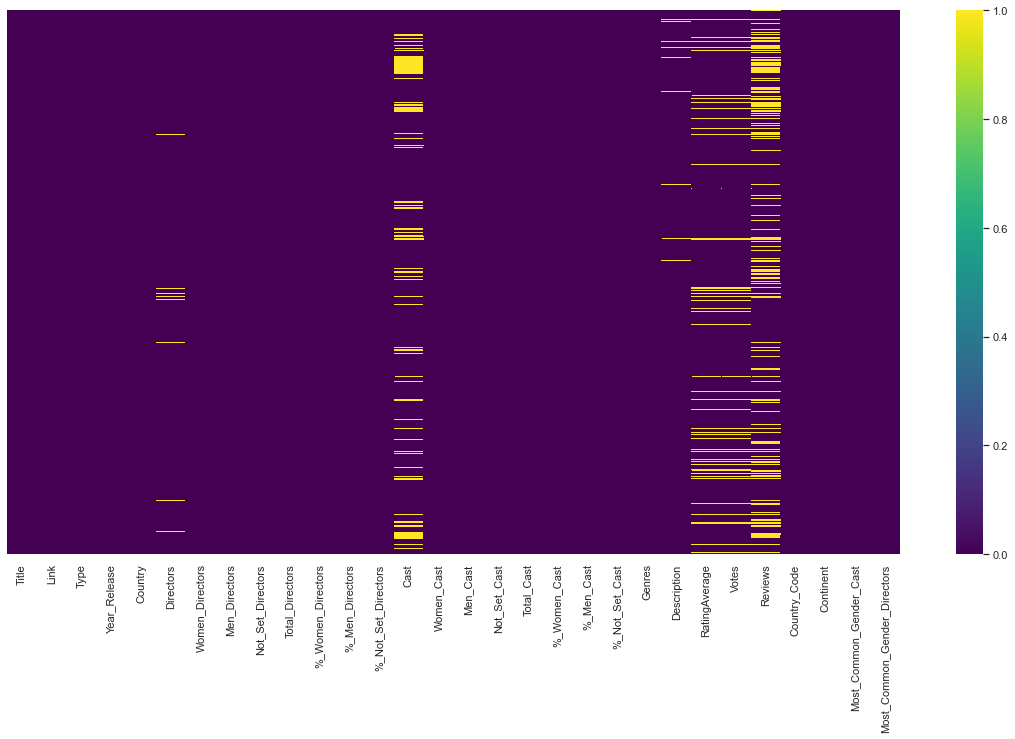

In [38]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.heatmap(data.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.show()

In [39]:
data.Reviews.isnull().sum()

568

In [40]:
data[data.Most_Common_Gender_Cast == 'Women']['Reviews'].value_counts(dropna=False).sum()

211

In [41]:
data[data.Most_Common_Gender_Cast == 'Men']['Reviews'].value_counts(dropna=False).sum()

1975

In [42]:
tr = data.groupby('Most_Common_Gender_Cast')['Reviews'].value_counts(dropna=False).sort_values(ascending=False)

In [43]:
tr.keys()[1][0]

'Women'

In [44]:
import plotly.graph_objects as go

x_nan = [tr.keys()[1][0], tr.keys()[0][0]]
y_nan = [tr.values[1], tr.values[0]]

x_total = ['Women', 'Men']
y_total = [data[data.Most_Common_Gender_Cast == 'Women']['Reviews'].value_counts(dropna=False).sum(), 
           data[data.Most_Common_Gender_Cast == 'Men']['Reviews'].value_counts(dropna=False).sum()]

fig = go.Figure(data=[
    go.Bar(name='NaN reviews', x=x_nan, y=y_nan, marker_color = 'red', opacity= 0.7),
    go.Bar(name='Total reviews', x=x_total, y=y_total, marker_color= 'lightslategray',
          opacity=0.8)
])

# Change the bar mode
fig.update_layout(barmode='group',title_text='NaN values in Reviews variable per gender')
fig.update_layout()
fig.show()

By deleting null values from Reviews column, I still had a proportional number of samples taking into account each gender.

In [307]:
reviews = data[['Title', 'Reviews', 'Most_Common_Gender_Cast', 'Most_Common_Gender_Directors']]
reviews.head()

,Title,Reviews,Most_Common_Gender_Cast,Most_Common_Gender_Directors
0,Money Heist,"""[4th Season Review]: [It] is like an extended...",Men,Men
1,The Blacklist,"""His name is above the title and, depending ho...",Men,Men
2,Locked Up,NaN,Women,Men
3,Prison Break,"""A strong cast led by Wentworth Miller (...) I...",Men,Men
4,13 Reasons Why,"""[2nd Season Review]: [It] is a frustratingly ...",Men,Men


In [308]:
reviews.Reviews.isnull().sum()

568

In [309]:
reviews.shape

(2186, 4)

In [310]:
reviews = reviews.dropna(subset=['Reviews'])
print(reviews.Reviews.isnull().sum())
reviews.shape

0


(1618, 4)

## Translating some reviews

While scrapping the data, some of the samples where in different languages. In order to perform a sentiment analysis with VADER I needed to translate them all into english. 

To do it, I used a module called *langdetect* to detect the reviews language for each movie and TV show, and used *googletrans* module to translate the ones that were not in english.

In [311]:
from langdetect import detect

In [312]:
#function that detects the language
def language_detection(text):
    try:
        return detect(text)
    except:
        return None

In [313]:
%%time
reviews['Language'] = reviews['Reviews'].apply(language_detection)

CPU times: user 14.1 s, sys: 80.8 ms, total: 14.2 s
Wall time: 14.2 s


In [362]:
reviews.head()

,Title,Reviews,Most_Common_Gender_Cast,Most_Common_Gender_Directors,Language
0,Money Heist,"""[4th Season Review]: [It] is like an extended...",Men,Men,en
1,The Blacklist,"""His name is above the title and, depending ho...",Men,Men,en
3,Prison Break,"""A strong cast led by Wentworth Miller (...) I...",Men,Men,en
4,13 Reasons Why,"""[2nd Season Review]: [It] is a frustratingly ...",Men,Men,en
5,Dark,"""[2nd Season Review]: 'Dark' has lofty narrati...",Men,Men,en


In [363]:
reviews.Language.value_counts()

es    1117
en     501
Name: Language, dtype: int64

In [232]:
from googletrans import Translator

translator = Translator()
translator.translate('안녕하세요.').text

'Hello.'

In [234]:
df_esp = reviews[reviews.Language == 'es']
print(df_esp.Language.value_counts())
df_esp = df_esp.reset_index(drop=True)
df_esp.head()

es    1117
Name: Language, dtype: int64


,Title,Reviews,Most_Common_Gender_Cast,Most_Common_Gender_Directors,Language
0,The Hockey Girls,"""La serie no arriesga demasiado, es cierto, pe...",Men,Men,es
1,Bitter Daisies,La evolución de los personajes (...) los giros...,Women,Men,es
2,Into the Night,"""Admito que el quinto capítulo me irritó un po...",Men,Men,es
3,LEGO Ninjago: Masters of Spinjitzu,"""Sigue siendo divertida, pero la fórmula empie...",Men,Men,es
4,The Hollow,"""Su éxito radica en la recompensa que ofrece a...",Men,Men,es


In [236]:
for item in df_esp.iloc[:2,:].Reviews:
    print(item)
    print(translator.translate(item).text,'\n\n\n')

"La serie no arriesga demasiado, es cierto, pero está bien llevada y es entretenida. Dentro del modelo tradicional, logra incluir un discurso fresco y una visión que pueda reunir a adultos y jóvenes ante la pantalla." 
"The series does not risk too much, it is true, but it is well-run and entertaining. Within the traditional model, it manages to include a fresh speech and a vision that can bring adults and young people together on screen." 



La evolución de los personajes (...) los giros de guión inesperados, la sencillez de los diálogos (...) y el nivel de intriga que conserva hasta el final mantienen al espectador pegado a la pantalla." 
The evolution of the characters (...) the unexpected turns of the script, the simplicity of the dialogues (...) and the level of intrigue that remains until the end keep the viewer glued to the screen. " 





In [252]:
for item in df_esp.iloc[440:,:].index:
    df_esp.iloc[item].Reviews = translator.translate(df_esp.iloc[item].Reviews).text

In [302]:
pd.set_option('display.max_rows', None)
df_esp

,Title,Reviews,Most_Common_Gender_Cast,Most_Common_Gender_Directors,Language
0,The Hockey Girls,"""The series does not risk too much, it is true...",Men,Men,es
1,Bitter Daisies,The evolution of the characters (...) the unex...,Women,Men,es
2,Into the Night,"""I admit that the fifth episode irritated me a...",Men,Men,es
3,LEGO Ninjago: Masters of Spinjitzu,"""It's still fun, but the formula is faltering ...",Men,Men,es
4,The Hollow,"""Its success lies in the reward it offers to v...",Men,Men,es
5,Yo-Kai Watch,"""A film that has charm, a message about the ne...",Men,Men,es
6,Dinosaur King,"""It does not offer contributions in visual ter...",Men,Men,es
7,Reality Z,"""Charlie Brooker deserved better than this abo...",Men,Men,es
8,The Haunting of Hill House,"""An effective look at overcoming trauma, told ...",Men,Men,es
9,Marianne,"""Netflix's scariest series (...) terrifies wit...",Women,Men,es


In [365]:
reviews = pd.merge(reviews, df_esp[['Title','Reviews']], left_on="Title", right_on="Title", how='outer')

In [366]:
reviews = reviews.reset_index(drop=True)
reviews.head()

,Title,Reviews_x,Most_Common_Gender_Cast,Most_Common_Gender_Directors,Language,Reviews_y
0,Money Heist,"""[4th Season Review]: [It] is like an extended...",Men,Men,en,NaN
1,The Blacklist,"""His name is above the title and, depending ho...",Men,Men,en,NaN
2,Prison Break,"""A strong cast led by Wentworth Miller (...) I...",Men,Men,en,NaN
3,13 Reasons Why,"""[2nd Season Review]: [It] is a frustratingly ...",Men,Men,en,NaN
4,Dark,"""[2nd Season Review]: 'Dark' has lofty narrati...",Men,Men,en,NaN


In [367]:
reviews.iloc[32]

Title                                                                     Shooter
Reviews_x                       "It’s a sturdy set-up for an action-thriller (...
Most_Common_Gender_Cast                                                       Men
Most_Common_Gender_Directors                                                  Men
Language                                                                       en
Reviews_y                       "It's a robust approach to an action thriller ...
Name: 32, dtype: object

In [368]:
reviews

,Title,Reviews_x,Most_Common_Gender_Cast,Most_Common_Gender_Directors,Language,Reviews_y
0,Money Heist,"""[4th Season Review]: [It] is like an extended...",Men,Men,en,NaN
1,The Blacklist,"""His name is above the title and, depending ho...",Men,Men,en,NaN
2,Prison Break,"""A strong cast led by Wentworth Miller (...) I...",Men,Men,en,NaN
3,13 Reasons Why,"""[2nd Season Review]: [It] is a frustratingly ...",Men,Men,en,NaN
4,Dark,"""[2nd Season Review]: 'Dark' has lofty narrati...",Men,Men,en,NaN
5,Riverdale,"""That 'Riverdale' is contradictory is part of ...",Men,Men,en,NaN
6,Lucifer,"""'Lucifer' certainly has a sense of atmosphere...",Men,Men,en,NaN
7,Peaky Blinders,"""[5th Season Review]: Good news (...) the form...",Men,Men,en,NaN
8,Jeffrey Epstein: Filthy Rich,"""It’s a worthwhile piece of work, if a painful...",Men,Women,en,NaN
9,Snowpiercer,"""The result is watchable, but not much more (....",Women,Men,en,NaN


In [369]:
for item in reviews.index:
    if reviews.iloc[item].Title == 'Shooter':
        print('yes1')
        if reviews.iloc[item].Language == 'en':
            print('yes2')
            reviews.iloc[item].Reviews_y = 'NaN'
            print(reviews.iloc[item].Reviews_y)

yes1
yes2
NaN
yes1


In [370]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1620 entries, 0 to 1619
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Title                         1620 non-null   object
 1   Reviews_x                     1620 non-null   object
 2   Most_Common_Gender_Cast       1620 non-null   object
 3   Most_Common_Gender_Directors  1620 non-null   object
 4   Language                      1620 non-null   object
 5   Reviews_y                     1120 non-null   object
dtypes: object(6)
memory usage: 76.1+ KB


In [373]:
for item in reviews.index:
    if reviews.iloc[item].Language == 'es':
        reviews.iloc[item].Reviews_x = reviews.iloc[item].Reviews_y

In [374]:
reviews

,Title,Reviews_x,Most_Common_Gender_Cast,Most_Common_Gender_Directors,Language,Reviews_y
0,Money Heist,"""[4th Season Review]: [It] is like an extended...",Men,Men,en,NaN
1,The Blacklist,"""His name is above the title and, depending ho...",Men,Men,en,NaN
2,Prison Break,"""A strong cast led by Wentworth Miller (...) I...",Men,Men,en,NaN
3,13 Reasons Why,"""[2nd Season Review]: [It] is a frustratingly ...",Men,Men,en,NaN
4,Dark,"""[2nd Season Review]: 'Dark' has lofty narrati...",Men,Men,en,NaN
5,Riverdale,"""That 'Riverdale' is contradictory is part of ...",Men,Men,en,NaN
6,Lucifer,"""'Lucifer' certainly has a sense of atmosphere...",Men,Men,en,NaN
7,Peaky Blinders,"""[5th Season Review]: Good news (...) the form...",Men,Men,en,NaN
8,Jeffrey Epstein: Filthy Rich,"""It’s a worthwhile piece of work, if a painful...",Men,Women,en,NaN
9,Snowpiercer,"""The result is watchable, but not much more (....",Women,Men,en,NaN


In [375]:
reviews = reviews[['Title','Reviews_x','Most_Common_Gender_Cast','Most_Common_Gender_Directors']]
reviews.head()

,Title,Reviews_x,Most_Common_Gender_Cast,Most_Common_Gender_Directors
0,Money Heist,"""[4th Season Review]: [It] is like an extended...",Men,Men
1,The Blacklist,"""His name is above the title and, depending ho...",Men,Men
2,Prison Break,"""A strong cast led by Wentworth Miller (...) I...",Men,Men
3,13 Reasons Why,"""[2nd Season Review]: [It] is a frustratingly ...",Men,Men
4,Dark,"""[2nd Season Review]: 'Dark' has lofty narrati...",Men,Men


In [376]:
%%time
reviews['Language'] = reviews['Reviews_x'].apply(language_detection)

CPU times: user 10.3 s, sys: 65.2 ms, total: 10.4 s
Wall time: 10.4 s


In [377]:
reviews.Language.value_counts()

en    1618
es       2
Name: Language, dtype: int64

In [378]:
reviews[reviews.Language == 'es']

,Title,Reviews_x,Most_Common_Gender_Cast,Most_Common_Gender_Directors,Language
910,Parásitos,"""Una reflexión sobre la complejidad moral del ...",Men,Men,es
979,Érase una vez en... Hollywood,"""El mayor logro que se puede adjudicar aquí Ta...",Men,Men,es


In [380]:
# I translate this two reviews with TextBlob, because googletrans didn't work
for item in reviews.index:
    if reviews.iloc[item].Language == 'es':
        blob = TextBlob(reviews.iloc[item].Reviews_x)
        trns = blob.translate(to = 'en').string
        reviews.iloc[item].Reviews_x = trns

In [381]:
reviews[reviews.Language == 'es']

,Title,Reviews_x,Most_Common_Gender_Cast,Most_Common_Gender_Directors,Language
910,Parásitos,"""A reflection on the moral complexity of socia...",Men,Men,es
979,Érase una vez en... Hollywood,"""The greatest achievement that can be awarded ...",Men,Men,es


In [382]:
reviews = reviews[['Title','Reviews_x','Most_Common_Gender_Cast','Most_Common_Gender_Directors']]
reviews.head()

,Title,Reviews_x,Most_Common_Gender_Cast,Most_Common_Gender_Directors
0,Money Heist,"""[4th Season Review]: [It] is like an extended...",Men,Men
1,The Blacklist,"""His name is above the title and, depending ho...",Men,Men
2,Prison Break,"""A strong cast led by Wentworth Miller (...) I...",Men,Men
3,13 Reasons Why,"""[2nd Season Review]: [It] is a frustratingly ...",Men,Men
4,Dark,"""[2nd Season Review]: 'Dark' has lofty narrati...",Men,Men


In [383]:
%%time
reviews['Language'] = reviews['Reviews_x'].apply(language_detection)

CPU times: user 11.8 s, sys: 88.4 ms, total: 11.9 s
Wall time: 11.9 s


In [384]:
reviews.Language.value_counts()

en    1620
Name: Language, dtype: int64

In [386]:
reviews.duplicated().sum()

2

In [387]:
reviews[reviews.duplicated()]

,Title,Reviews_x,Most_Common_Gender_Cast,Most_Common_Gender_Directors,Language
1252,Hasta que la boda nos separe,"""Dani de la Orden (...) gives it its usual ele...",Men,Men,en
1253,Hasta que la boda nos separe,"""In the style of a false documentary (...) The...",Men,Men,en


In [390]:
reviews[reviews.Title == 'Hasta que la boda nos separe ']

,Title,Reviews_x,Most_Common_Gender_Cast,Most_Common_Gender_Directors,Language
1250,Hasta que la boda nos separe,"""Dani de la Orden (...) gives it its usual ele...",Men,Men,en
1251,Hasta que la boda nos separe,"""In the style of a false documentary (...) The...",Men,Men,en
1252,Hasta que la boda nos separe,"""Dani de la Orden (...) gives it its usual ele...",Men,Men,en
1253,Hasta que la boda nos separe,"""In the style of a false documentary (...) The...",Men,Men,en


In [391]:
reviews = reviews.drop_duplicates()
reviews.head()

,Title,Reviews_x,Most_Common_Gender_Cast,Most_Common_Gender_Directors,Language
0,Money Heist,"""[4th Season Review]: [It] is like an extended...",Men,Men,en
1,The Blacklist,"""His name is above the title and, depending ho...",Men,Men,en
2,Prison Break,"""A strong cast led by Wentworth Miller (...) I...",Men,Men,en
3,13 Reasons Why,"""[2nd Season Review]: [It] is a frustratingly ...",Men,Men,en
4,Dark,"""[2nd Season Review]: 'Dark' has lofty narrati...",Men,Men,en


In [392]:
reviews = reviews.reset_index(drop=True)
reviews.head()

,Title,Reviews_x,Most_Common_Gender_Cast,Most_Common_Gender_Directors,Language
0,Money Heist,"""[4th Season Review]: [It] is like an extended...",Men,Men,en
1,The Blacklist,"""His name is above the title and, depending ho...",Men,Men,en
2,Prison Break,"""A strong cast led by Wentworth Miller (...) I...",Men,Men,en
3,13 Reasons Why,"""[2nd Season Review]: [It] is a frustratingly ...",Men,Men,en
4,Dark,"""[2nd Season Review]: 'Dark' has lofty narrati...",Men,Men,en


In [393]:
reviews = reviews[['Title','Reviews_x','Most_Common_Gender_Cast','Most_Common_Gender_Directors']]
reviews.head()

,Title,Reviews_x,Most_Common_Gender_Cast,Most_Common_Gender_Directors
0,Money Heist,"""[4th Season Review]: [It] is like an extended...",Men,Men
1,The Blacklist,"""His name is above the title and, depending ho...",Men,Men
2,Prison Break,"""A strong cast led by Wentworth Miller (...) I...",Men,Men
3,13 Reasons Why,"""[2nd Season Review]: [It] is a frustratingly ...",Men,Men
4,Dark,"""[2nd Season Review]: 'Dark' has lofty narrati...",Men,Men


## Saving the data

Finally, I saved the data into a new .csv file, to use it later in the next notebook.

In [394]:
reviews.to_csv('../Datasets/final_dataset_nlp_clean.csv')